In [10]:
import pandas as pd
import os
import sys
# old_stdout = sys.stdout
# sys.stdout = open('/home/annas/comp598-2021/hw4/submission_template/stdout.txt', 'w')
# abs_path= os.path.abspath("requirements.txt")
# data_path = os.path.join(os.path.dirname(abs_path), 'data/trimed.csv')
# print(data_path)
data = pd.read_csv("C:/Users/annas/OneDrive - McGill University/Fall 2021/COMP 598/COMP598-Assignments/hw4/submission_template/data/trimed.csv",
 usecols=[0,1,2,8], 
 parse_dates=[1,2], 
 names = ['unique_key', 'created_date', 'closed_date', 'zipcode' ], 
 index_col=False)
print(len(data))
data = data.dropna()
print(len(data))
data = data.loc[data["closed_date"] >= data["created_date"]]
print(len(data))

1887577
1704276
1696129


In [11]:

# cols = range(1,42)
# data =  pd.read_csv("C:/Users/annas/OneDrive - McGill University/Fall 2021/COMP 598/COMP598-Assignments/hw4/submission_template/data/trimed.csv", names=cols, sep=',', dtype='unicode')
#print(data.head(1))
print(data['zipcode'].nunique()) # count all non-NA distinct values


236


In [25]:
data = pd.read_csv("C:/Users/annas/OneDrive - McGill University/Fall 2021/COMP 598/COMP598-Assignments/hw4/submission_template/data/clean_data.csv")
data['created_date'] = pd.to_datetime(data['created_date'])
data['closed_date'] = pd.to_datetime(data['closed_date'] )

In [27]:
print(data.closed_date.dtype)
print(data.head())

datetime64[ns]
   unique_key        created_date         closed_date  zipcode
0    46920293 2020-07-20 10:51:12 2020-09-05 12:32:48    11234
1    46930483 2020-07-21 14:13:58 2020-09-05 13:37:31    11210
2    46997111 2020-07-27 12:56:33 2020-09-05 08:51:14    11354
3    46583727 2020-06-22 18:17:00 2020-06-23 08:59:00    10451
4    46576371 2020-06-21 03:30:00 2020-06-22 21:50:00    10031


In [60]:
zipcode = 11210
#zip_data = data.loc[data['zipcode'] == zipcode]
zip_data = data
print(zip_data)
month = zip_data.closed_date.dt.to_period("M")
group_by_month =  zip_data.assign(diff_h=(zip_data.closed_date - zip_data.created_date).dt.total_seconds()/3600)
print(group_by_month.head())
group_by_month = group_by_month.groupby(month)['closed_date', 'diff_h'].mean()
print(group_by_month)


         unique_key        created_date         closed_date  zipcode
0          46920293 2020-07-20 10:51:12 2020-09-05 12:32:48    11234
1          46930483 2020-07-21 14:13:58 2020-09-05 13:37:31    11210
2          46997111 2020-07-27 12:56:33 2020-09-05 08:51:14    11354
3          46583727 2020-06-22 18:17:00 2020-06-23 08:59:00    10451
4          46576371 2020-06-21 03:30:00 2020-06-22 21:50:00    10031
...             ...                 ...                 ...      ...
1696124    46816724 2020-07-10 10:34:45 2020-08-26 00:00:00    10075
1696125    47117378 2020-08-05 14:55:52 2020-08-13 18:35:49    11221
1696126    46830035 2020-07-11 10:53:00 2020-08-21 12:00:00    11421
1696127    46874418 2020-07-16 12:00:23 2020-08-30 17:59:47    11691
1696128    46876421 2020-07-16 16:55:32 2020-09-05 13:28:38    11226

[1696129 rows x 4 columns]
   unique_key        created_date         closed_date  zipcode       diff_h
0    46920293 2020-07-20 10:51:12 2020-09-05 12:32:48    11234  1129

C:\Users\annas\AppData\Local\Temp/ipykernel_15924/596860926.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_by_month = group_by_month.groupby(month)['closed_date', 'diff_h'].mean()


<AxesSubplot:xlabel='closed_date'>

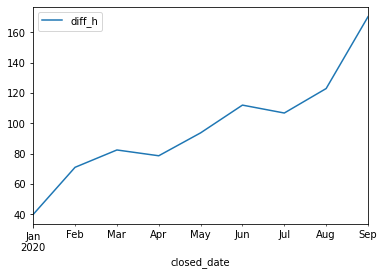

In [59]:
group_by_month.plot.line()